In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17413, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 17413 (delta 64), reused 22 (delta 22), pack-reused 17327 (from 4)
Receiving objects: 100% (17413/17413), 16.31 MiB | 27.65 MiB/s, done.
Resolving deltas: 100% (11932/11932), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s e

In [ ]:

!unzip /content/drive/MyDrive/yolo_full_dataset.zip -d /content/yolo_dataset/
!unzip /content/drive/MyDrive/cnn_dataset_ready.zip -d /content/cnn_dataset/

unzip:  cannot find or open /content/drive/MyDrive/yolo_full_dataset.zip, /content/drive/MyDrive/yolo_full_dataset.zip.zip or /content/drive/MyDrive/yolo_full_dataset.zip.ZIP.
unzip:  cannot find or open /content/drive/MyDrive/cnn_dataset_ready.zip, /content/drive/MyDrive/cnn_dataset_ready.zip.zip or /content/drive/MyDrive/cnn_dataset_ready.zip.ZIP.


In [ ]:
%cd /content/yolov5
!python train.py

/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-04 02:17:08.878044: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746325029.179097    2286 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746325029.266257    2286 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for 

In [ ]:

%cd /content/yolov5
!python train.py --img 416 --batch 8 --epochs 30 --data /content/yolo_dataset/data.yaml --weights yolov5s.pt --name box_defect_yolo

/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-05-04 02:27:03.902719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746325623.925194    4843 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746325623.931982    4843 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second tim

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_ds = datasets.ImageFolder('/content/drive/MyDrive/THÙNG CARTON', transform=transform)
train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 16, 3), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*54*54, 128), nn.ReLU(), nn.Dropout(0.5),
            nn.Linear(128, 2)
        )
    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x


In [ ]:
model = CNN().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

for epoch in range(10):
    model.train()
    for imgs, labels in train_loader:
        imgs, labels = imgs.cuda(), labels.cuda()
        optimizer.zero_grad()
        out = model(imgs)
        loss = criterion(out, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} done")

Epoch 1 done
Epoch 2 done
Epoch 3 done
Epoch 4 done
Epoch 5 done
Epoch 6 done
Epoch 7 done
Epoch 8 done
Epoch 9 done
Epoch 10 done


cp: cannot stat '/content/drive/MyDrive/test_box.png': No such file or directory
detect: weights=yolov5s.pt, source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 30.0ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 31.6ms
Speed: 0.5ms pre-process, 30.8ms inference, 60.8ms NMS per image at shape (1, 3, 640, 640)
Results 

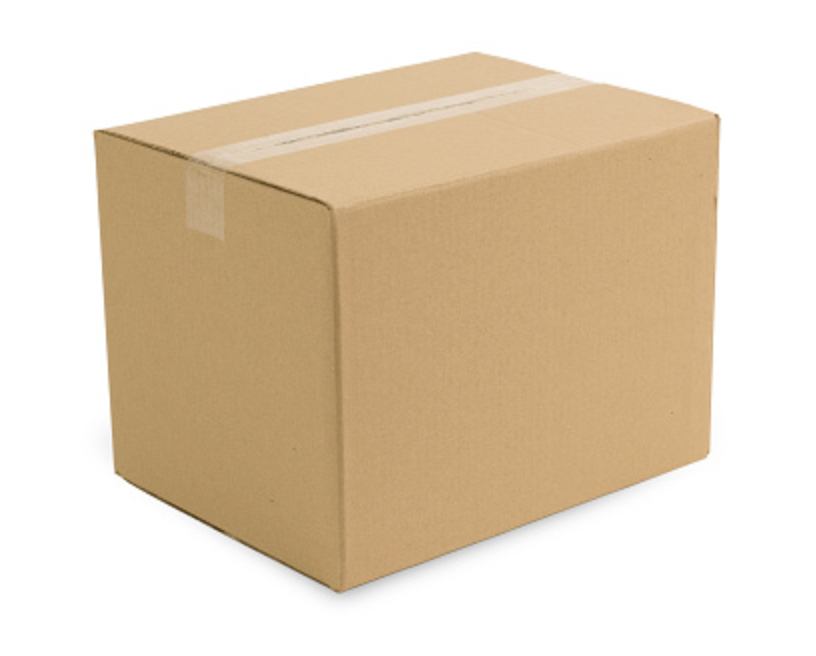

In [ ]:
!cp /content/drive/MyDrive/test_box.png /content/yolov5/

!python detect.py
from IPython.display import Image as IPImage
IPImage(filename='/content/drive/MyDrive/THÙNG CARTON/dat/đạt1.png')

In [ ]:

from PIL import Image
import torch.nn.functional as F
from torchvision import transforms

img = Image.open('/content/drive/MyDrive/THÙNG CARTON/dat/đạt1.png').convert("RGB")
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
img_tensor = transform(img).unsqueeze(0).cuda()

model.eval()
with torch.no_grad():
    out = model(img_tensor)
    prob = F.softmax(out, dim=1)
    pred = torch.argmax(prob, dim=1).item()

label = "ĐẠT YÊU CẦU" if pred == 1 else "KHÔNG ĐẠT"
print(f"Kết quả CNN phân loại: {label} (xác suất: {prob[0][pred].item():.2f})")

img.show()

Kết quả CNN phân loại: ĐẠT YÊU CẦU (xác suất: 0.68)
